In [1]:
#import torch
#import torch.nn as nn
#import torch.optim as optim
#from torch.utils.data import DataLoader, TensorDataset
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:

# 1. Carregar os dados
df = pd.read_csv("dataset/MBA.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


## Análise Exploratória dos dados

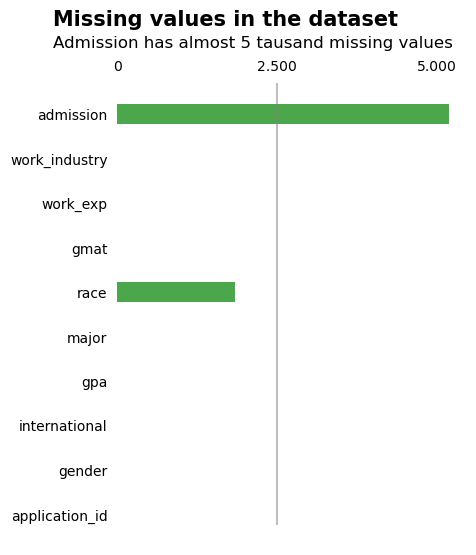

In [5]:
# Verificando NaN

missing_values = df.isnull().sum()

fig, ax = plt.subplots(figsize=(4.5, 6))

ax.barh(missing_values.index, missing_values.values, height=0.45,color='green', alpha=0.7)

# Adicionando o título

ax.text(x= -1000,y=11, s='Missing values in the dataset',
       size = 15, weight = 'bold')

# Adicionando o subtítulo
ax.text(x=-1000,y=10.5,s='Admission has almost 5 tausand missing values',
       size= 12)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.set_xticks([0, 2500, 5000])
ax.set_xticklabels(['0','2.500','5.000'])

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='black')
ax.axvline(x=2500, ymin=0.045, c='grey', alpha=0.5)

plt.show()

In [3]:
# Analyzing the admission column for desbalancing
df.groupby(by='admission').count()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
admission,,,,,,,,,
Admit,900,900,900,900,900,622,900,900,900
Waitlist,100,100,100,100,100,70,100,100,100


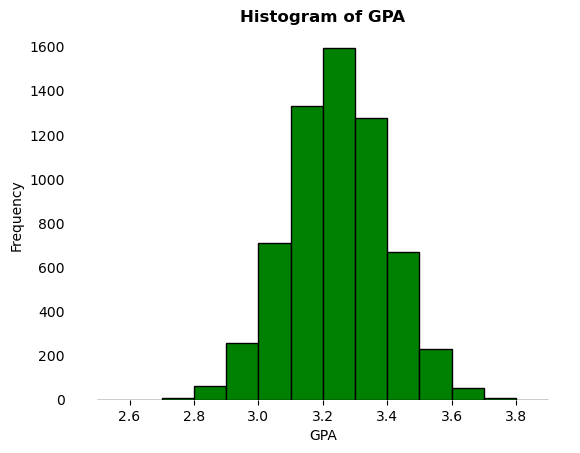

max value: 3.77
min value: 2.65
mean: 3.25
median: 3.25


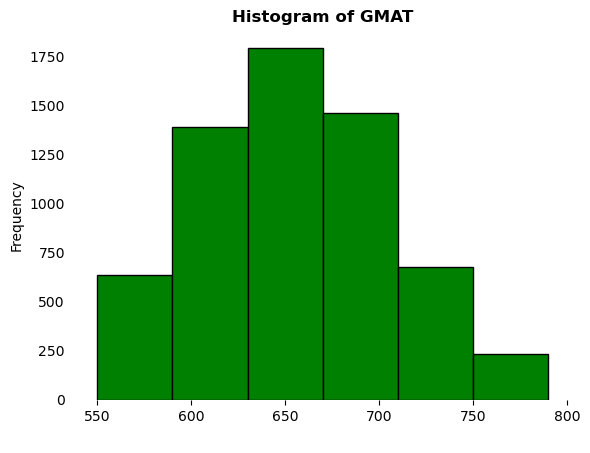

max value: 780.0
min value: 570.0
mean: 651.09
median: 650.0


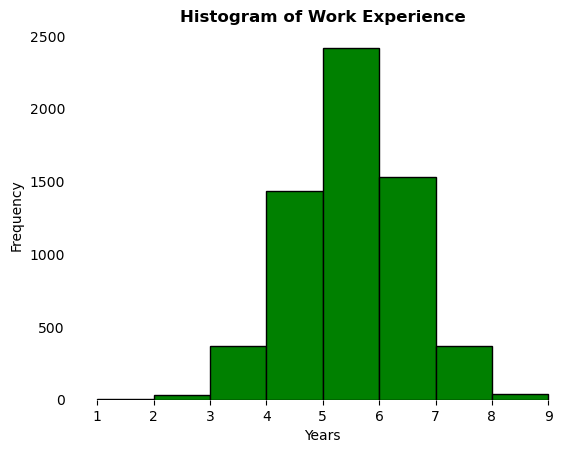

max value: 9.0
min value: 1.0
mean: 5.02
median: 5.0


In [ ]:
bins_dict = {
    "gpa": np.arange(2.5, 4, 0.10),
    "gmat": np.arange(550, 800, 40),
    "work_exp": np.arange(1, 10, 1)
}

title_dict = {
    "gpa": "GPA",
    "gmat": "GMAT",
    "work_exp": "Work Experience"
}

xlabel_dict = {
    "gpa": "GPA",
    "gmat": " ",
    "work_exp": "Years"
}

for category in ["gpa", "gmat", "work_exp"]:
    fig, ax = plt.subplots()

    # Using the right bins for each category
    bins = bins_dict[category]

    ax.hist(df[category], bins=bins, color='green', alpha=0.7, edgecolor='black')

    # Estilização do gráfico
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

    ax.tick_params(top=False, left=False)
    ax.tick_params(axis='x', colors='black')

    ax.set_title(f"Histogram of {title_dict[category]}",weight='bold')
    ax.set_xlabel(xlabel_dict[category])
    ax.set_ylabel("Frequency")
    plt.show()
    print(f"max value: {np.max(df[category])}")
    print(f"min value: {np.min(df[category])}")
    print(f"mean: {df[category].mean().__round__(2)}")
    print(f"median: {df[category].median()}")

In [4]:
# Analysing the gender column
df.groupby(by='gender').count()

,application_id,international,gpa,major,race,gmat,work_exp,work_industry,admission
gender,,,,,,,,,
Female,2251,2251,2251,2251,1592,2251,2251,2251,500
Male,3943,3943,3943,3943,2760,3943,3943,3943,500


## Engenharia de Atributos

In [5]:
df['admission'].unique()

array(['Admit', nan, 'Waitlist'], dtype=object)

In [6]:
#organizando a coluna 'admission'

df.loc[df["admission"] == "Waitlist", "admission"] = "Admit"

df["admission"] = (df["admission"] == "Admit").astype(int)

df['admission'].unique()

array([1, 0])

In [7]:
#organizando a coluna 'race'

df.fillna(value={'race':  "Unknown"}, inplace=True)

In [8]:
# Map 'Female' to 0 and 'Male' to 1, then convert to integer

df["gender"] = df["gender"].map({'Female': 1, 'Male': 0}).astype(int)

In [9]:
df["race"].unique()

array(['Asian', 'Black', 'Unknown', 'Hispanic', 'White', 'Other'],
      dtype=object)

In [10]:
# Map races kinds and then convert to integer

df["race"] = df["race"].map({'Other': 0, 'Hispanic': 1,'Black':2, 'Asian':3,'White':4,'Unknown':5}).astype(int)

In [11]:
df["work_industry"].unique()

array(['Financial Services', 'Investment Management', 'Technology',
       'Consulting', 'Nonprofit/Gov', 'PE/VC', 'Health Care',
       'Investment Banking', 'Other', 'Retail', 'Energy', 'CPG',
       'Real Estate', 'Media/Entertainment'], dtype=object)

In [12]:
df["work_industry"] = df["work_industry"].map({
    'CPG': 0,
    'Consulting': 1,
    'Energy': 2,
    'Financial Services': 3,
    'Health Care': 4,
    'Investment Banking': 5,
    'Investment Management': 6,
    'Media/Entertainment': 7,
    'Nonprofit/Gov': 8,
    'Other': 9,
    'PE/VC': 10,
    'Real Estate': 11,
    'Retail': 12,
    'Technology': 13
}).astype(int)


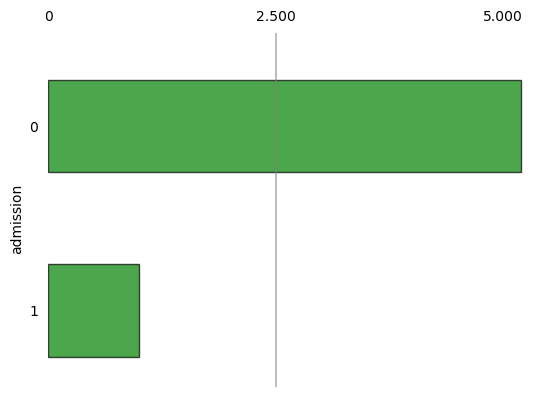

In [13]:
# Balanceamento de classes
fig, ax = plt.subplots()
df["admission"].value_counts().sort_values(ascending=True).plot(kind='barh', color='green', alpha=0.7, edgecolor='black', ax=ax)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.set_xticks([0, 2500, 5000])
ax.set_xticklabels(['0', '2.500', '5.000'])

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='black')
ax.axvline(x=2500, ymin=0.045, c='grey', alpha=0.5)

plt.show()


In [14]:
# Fazendo um under-sampling na classe 0 da coluna 'admission'
df_0 = df[df["admission"] == 0].sample(n=len(df[df["admission"] == 1]), random_state=42)
df_1 = df[df["admission"] == 1]
df = pd.concat([df_0, df_1], axis=0)


In [15]:
# Analyzing the admission column for desbalancing
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
4301,4302,1,False,3.16,Humanities,4,630.0,5.0,1,0
125,126,0,False,3.44,Business,4,740.0,6.0,10,0
5719,5720,1,False,3.51,STEM,2,590.0,5.0,10,0
5329,5330,0,False,3.08,STEM,3,610.0,7.0,4,0
5158,5159,0,True,3.41,Humanities,5,630.0,4.0,10,0
...,...,...,...,...,...,...,...,...,...,...
6152,6153,1,False,3.31,Business,2,690.0,3.0,9,1
6168,6169,1,False,3.21,STEM,4,680.0,5.0,1,1
6175,6176,1,False,3.38,Humanities,1,680.0,3.0,13,1
6177,6178,0,False,3.35,Humanities,1,750.0,5.0,10,1


## Implementação do Modelo em Pytorch

In [17]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

## Train

In [18]:
# Adicionando a coluna 'gender' ao conjunto de dados para treinamento

features = ["gpa", "gmat", "work_exp", 'gender','race','work_industry']
X = df[features].values
y = df["admission"].values

In [19]:
# Separar em treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)


In [20]:
def figure1(X_train, y_train, X_val, y_val, cm_bright=None):
    if cm_bright is None:
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)#, edgecolors='k')
    #ax[0].set_xlabel(r'$X_1$')
    #ax[0].set_ylabel(r'$X_2$')
    #ax[0].set_xlim([-2.3, 2.3])
    #ax[0].set_ylim([-2.3, 2.3])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright)#, edgecolors='k')
    #ax[1].set_xlabel(r'$X_1$')
    #ax[1].set_ylabel(r'$X_2$')
    #ax[1].set_xlim([-2.3, 2.3])
    #ax[1].set_ylim([-2.3, 2.3])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()

    return fig

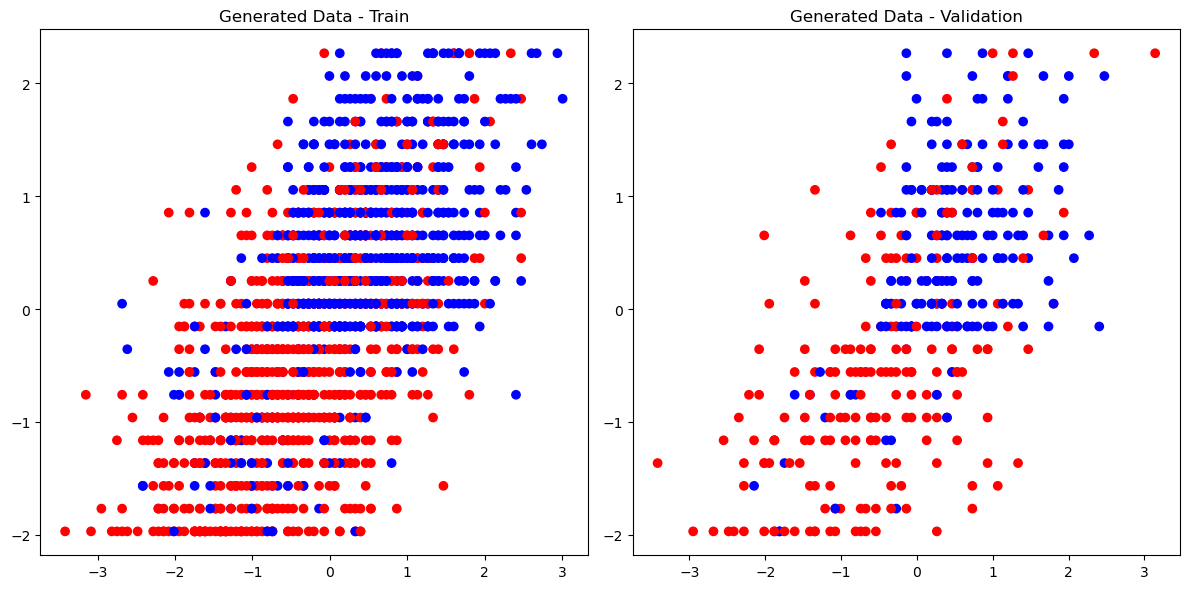

In [21]:
fig = figure1(X_train, y_train, X_val, y_val)
plt.show()

In [22]:
torch.manual_seed(42)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)


In [23]:
y_train_tensor.size(), y_val_tensor.size(), x_train_tensor.size(), x_val_tensor.size()

(torch.Size([1600, 1]),
 torch.Size([400, 1]),
 torch.Size([1600, 6]),
 torch.Size([400, 6]))

In [24]:

# 2. Modelo simples
lr = 0.0001

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(6, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()


In [26]:
n_epochs = 200

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

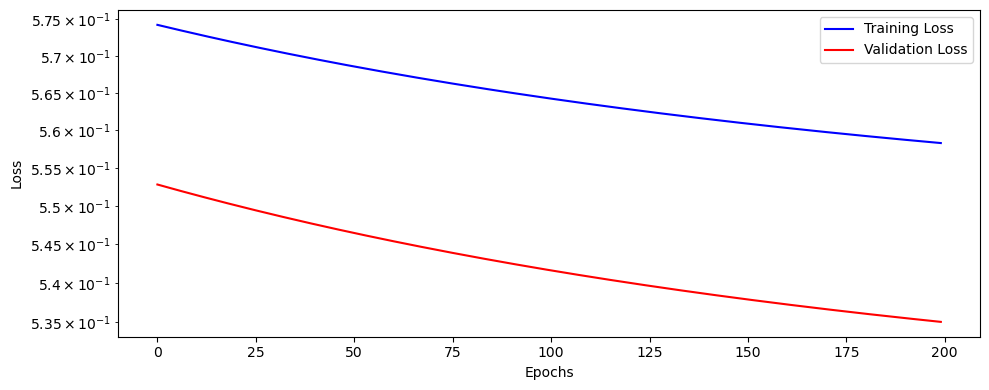

In [27]:
fig = arch.plot_losses()

plt.show()

In [28]:
print(model.state_dict())

OrderedDict({'linear.weight': tensor([[ 0.4522,  0.5589, -0.0697,  0.3914, -0.0131,  0.0493]],
       device='cuda:0'), 'linear.bias': tensor([-0.1100], device='cuda:0')})


In [29]:
logits_val = arch.predict(X_val[:4])
logits_val

array([[ 0.7020361 ],
       [ 0.75064653],
       [ 0.5055569 ],
       [-1.2297997 ]], dtype=float32)

In [30]:
# prediction probabilities
prob_val = torch.sigmoid(torch.as_tensor(logits_val[:4]).float())
prob_val

tensor([[0.6686],
        [0.6793],
        [0.6238],
        [0.2262]])

In [31]:
classes = (prob_val >= 0.5).to(torch.int8)
classes

tensor([[1],
        [1],
        [1],
        [0]], dtype=torch.int8)

In [33]:
from matplotlib.colors import ListedColormap
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def figure7(X, y, model, device, cm=None, cm_bright=None):
    if cm is None:
        cm = plt.cm.RdBu
    if cm_bright is None:
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    fig = plt.figure(figsize=(15, 4.5))

    h = .02  # step size in the mesh

    # x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    # y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

    x_min, x_max = -2.25, 2.25
    y_min, y_max = -2.25, 2.25

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    logits = model(torch.as_tensor(np.c_[xx.ravel(), yy.ravel()]).float().to(device))
    logits = logits.detach().cpu().numpy().reshape(xx.shape)

    yhat = sigmoid(logits)

    # 1st plot
    ax = plt.subplot(1, 3, 1)

    contour = ax.contourf(xx, yy, logits, 25, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    # Plot the testing points
    #ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_title(r'$z = b + w_1x_1 + w_2x_2$')
    ax.grid(False)
    ax_c = plt.colorbar(contour)
    ax_c.set_label("$z$", rotation=0)

    # 2nd plot
    ax = fig.add_subplot(1, 3, 2, projection='3d')

    surf = ax.plot_surface(xx, yy, yhat, rstride=1, cstride=1, alpha=.5, cmap=cm, linewidth=0, antialiased=True, vmin=0, vmax=1)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    # Plot the testing points
    #ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_title(r'$\sigma(z) = P(y=1)$')

    ax_c = plt.colorbar(surf)
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.view_init(30, 220)

    # 3rd plot
    ax = plt.subplot(1, 3, 3)

    ax.contour(xx, yy, yhat, levels=[.5], cmap="Greys", vmin=0, vmax=1)
    contour = ax.contourf(xx, yy, yhat, 25, cmap=cm, alpha=.8, vmin=0, vmax=1)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    # Plot the testing points
    #ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_title(r'$\sigma(z) = P(y=1)$')
    ax.grid(False)

    ax_c = plt.colorbar(contour)
    ax_c.set_ticks([0, .25, .5, .75, 1])

    plt.tight_layout()

    return fig

In [34]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

In [35]:
def split_cm(cm):
    # Actual negatives go in the top row,
    # above the probability line
    actual_negative = cm[0]
    # Predicted negatives go in the first column
    tn = actual_negative[0]
    # Predicted positives go in the second column
    fp = actual_negative[1]

    # Actual positives go in the bottow row,
    # below the probability line
    actual_positive = cm[1]
    # Predicted negatives go in the first column
    fn = actual_positive[0]
    # Predicted positives go in the second column
    tp = actual_positive[1]

    return tn, fp, fn, tp

In [36]:
def tpr_fpr(cm):
    tn, fp, fn, tp = split_cm(cm)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

In [37]:
def precision_recall(cm):
    tn, fp, fn, tp = split_cm(cm)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return precision, recall

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc,accuracy_score
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[155,  44],
       [ 53, 148]])

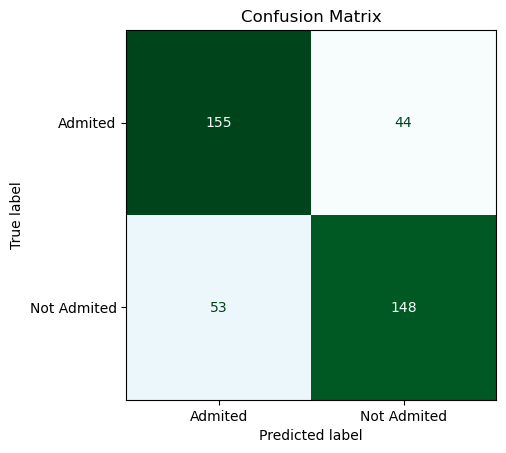

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

# Cria a matriz de confusão
cm = confusion_matrix(y_val, (probabilities_val >= 0.5))

# Plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Admited", "Not Admited"])
disp.plot(cmap=plt.cm.BuGn, colorbar=False)
plt.title("Confusion Matrix")
plt.show()

In [40]:
precision_recall(cm_thresh50)

(0.7708333333333334, 0.736318407960199)

In [41]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.7575

## Salvando o modelo

In [ ]:
arch.save_checkpoint("checkpoint_completo.pth")